In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift, ifft2, ifftshift


In [58]:
chara = plt.imread("Hinh/characters_test_pattern.tif")

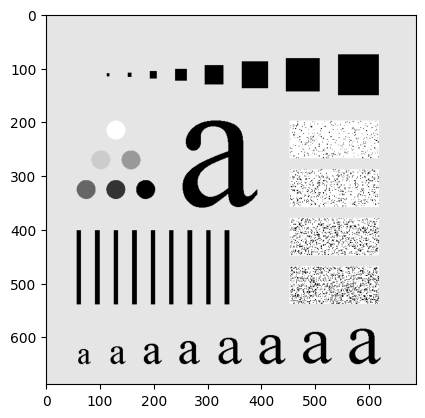

In [59]:
plt.imshow(chara, cmap='gray')

In [60]:
def Zero_Padding(img, nx, ny):
    height, width = img.shape
    height_new = height + 2*nx
    width_new = width + 2*ny
    output = np.zeros([height_new, width_new])
    output[nx:height_new-nx, ny:width_new-ny] = img
    return output

# I) Ideal Low - pass

In [61]:
def ideal_low_pass(img, D0, temp=-1, uk=0, vk=0):
    U, V = img.shape
    result = np.zeros((U, V))
    for u in range(U):
        for v in range(V):
            D = ( (u + temp*U/2 + uk)**2 + (v + temp*V/2 + vk)**2 )**0.5
            if D <= D0:
                result[u,v] = 1
    return result

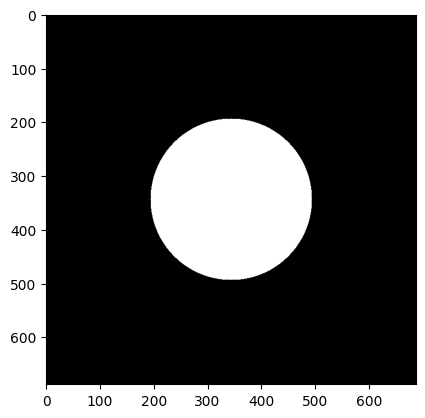

In [62]:
char_low = ideal_low_pass(chara, 150)
plt.imshow(char_low, cmap='gray')

# II) Gaussian Low-pass Filter

In [63]:
def gauss_low_filter(img, D0, temp=-1, uk=0, vk=0):
    U, V = img.shape
    result = np.zeros((U, V))
    for u in range(U):
        for v in range(V):
            D = ( (u + temp*U/2 + uk)**2 + (v + temp*V/2 + vk)**2 )**0.5
            result[u, v] = np.exp(-0.5 * D**2 / D0**2)
    return result

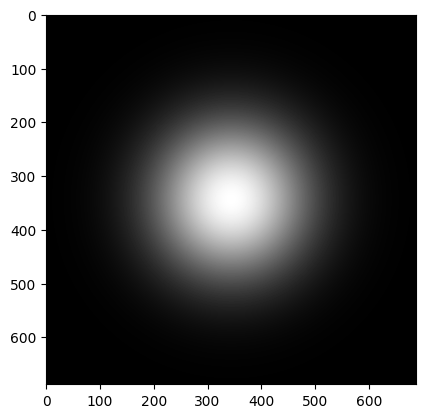

In [64]:
char_low_gaus = gauss_low_filter(chara, 100)
plt.imshow(char_low_gaus, cmap='gray')

# III) Butterworth Low - pass

In [65]:
def butterworth_low_filter(img, D0, n, temp=-1, uk=0, vk=0):
    U, V = img.shape
    result = np.zeros((U, V))
    for u in range(U):
        for v in range(V):
            D = ( (u + temp*U/2 + uk)**2 + (v + temp*V/2 + vk)**2 )**0.5
            result[u, v] = 1 / (( 1 + (D/D0) )**(2*n))
    return result

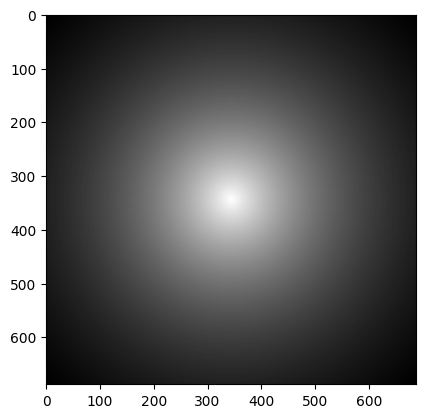

In [66]:
char_low_but = butterworth_low_filter(chara, 1000, 2)
plt.imshow(char_low_but, cmap='gray')

# IV) Hight - pass - Filter

\begin{align}
    \text{Hight} = 1 - \text{Low}
\end{align}

# V) Laplace

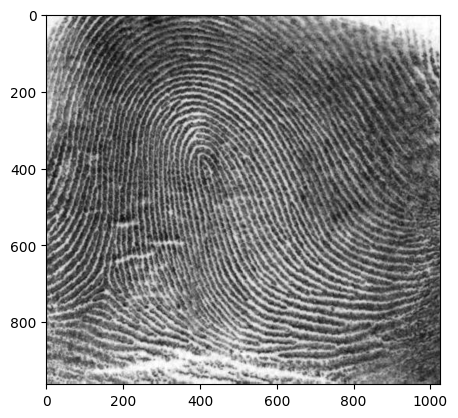

In [67]:
thumb = plt.imread("Hinh/thumb_print.tif")
plt.imshow(thumb, cmap='gray')

/tmp/ipykernel_2663728/4134957272.py:22: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(G_shift)), cmap='gray')


(-0.5, 1025.5, 961.5, -0.5)

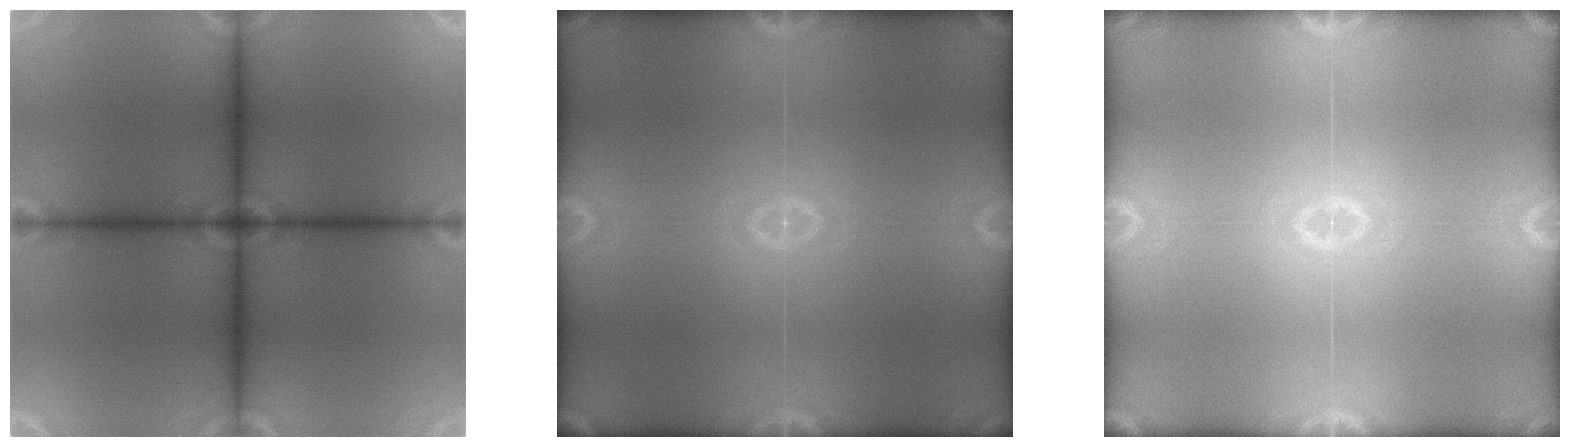

In [68]:
# Fourier transform
F = fft2(thumb)
F_shift = fftshift(F)
H_hight = 1 - butterworth_low_filter(thumb, 100, 2)
G_shift = F_shift * H_hight

# Inverse Fourier transform
G = ifftshift(G_shift)
g = ifft2(G).real

plt.figure(figsize=(20, 10))

plt.subplot(131)
plt.imshow(np.log(np.abs(F)), cmap='gray')
plt.axis('off')

plt.subplot(132)
plt.imshow(np.log(np.abs(F_shift)), cmap='gray')
plt.axis('off')

plt.subplot(133)
plt.imshow(np.log(np.abs(G_shift)), cmap='gray')
plt.axis('off')

(-0.5, 1025.5, 961.5, -0.5)

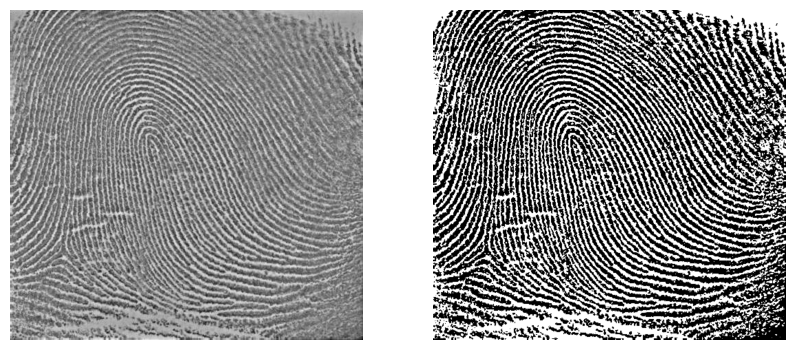

In [69]:
plt.figure(figsize=(10, 8))

plt.subplot(121)
plt.imshow(g, cmap='gray')
plt.axis('off')

g_thresh = g
for i in range(g.shape[0]):
    for j in range(g.shape[1]):
        if g_thresh[i, j] < 0:
            g_thresh[i, j] = 0
        else:
            g_thresh[i, j] = 1

plt.subplot(122)
plt.imshow(g_thresh, cmap='gray')
plt.axis('off')

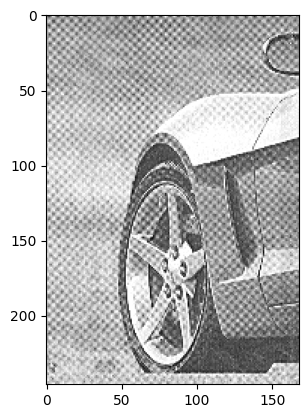

In [70]:
car_noise = plt.imread("Hinh/car_75DPI_Moire.tif")
plt.imshow(car_noise, cmap='gray')

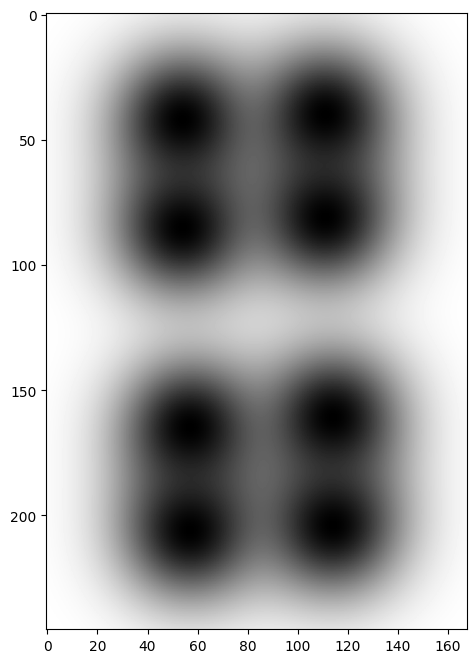

In [71]:

car_h_but_1_1 = 1 - gauss_low_filter(car_noise, 20, uk=-(40-2), vk=-(55-25))
car_h_but_1_2 = 1 - gauss_low_filter(car_noise, 20, -1, uk=40-2, vk=55-25)

car_h_but_2_1 = 1 - gauss_low_filter(car_noise, 20, uk=-(40+2), vk=55-28)
car_h_but_2_2 = 1 - gauss_low_filter(car_noise, 20, -1, uk=40+2, vk=-(55-28))

car_h_but_3_1 = 1 - gauss_low_filter(car_noise, 20, uk=-(83-2), vk=-(55-25))
car_h_but_3_2 = 1 - gauss_low_filter(car_noise, 20, -1, uk=83-2, vk=55-25)

car_h_but_4_1 = 1 - gauss_low_filter(car_noise, 20, uk=-(83), vk=55-28)
car_h_but_4_2 = 1 - gauss_low_filter(car_noise, 20, -1, uk=83, vk=-(55-28))

car_h_but_fn = car_h_but_1_1 * car_h_but_1_2 * car_h_but_2_1 * car_h_but_2_2 * car_h_but_3_1 * car_h_but_3_2 * car_h_but_4_1 * car_h_but_4_2

plt.figure(figsize=(10, 8))
plt.imshow(car_h_but_fn, cmap='gray')

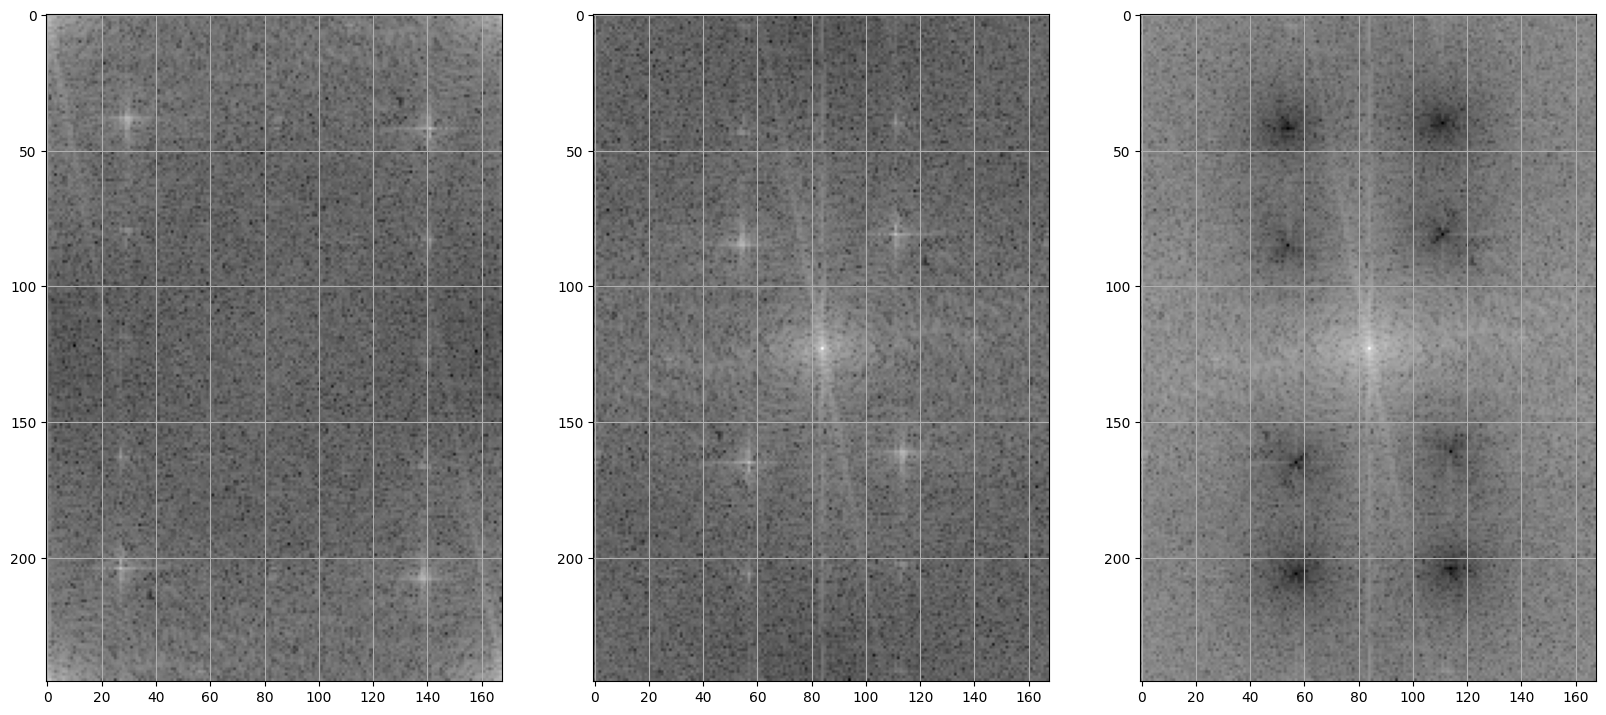

In [72]:
# Fourier transform
pad = np.zeros((car_noise.shape[0]*2, car_noise.shape[1]*2))
pad[:car_noise.shape[0], :car_noise.shape[1]] = car_noise
F = fft2(car_noise)
F_shift = fftshift(F)
G_shift = F_shift * car_h_but_fn

# Inverse Fourier transform
G = ifftshift(G_shift)
g = ifft2(G)

plt.figure(figsize=(20, 10))

plt.subplot(131)
plt.imshow(np.log(np.abs(F)), cmap='gray')
#plt.axis('off')
plt.grid(True)

plt.subplot(132)
plt.imshow(np.log(np.abs(F_shift)+1), cmap='gray')
#plt.axis('off')
plt.grid(True)

plt.subplot(133)
plt.imshow(np.log(np.abs(G_shift)+1), cmap='gray')
#plt.axis('off')
plt.grid(True)

plt.show()

/tmp/ipykernel_2663728/2550062215.py:1: RuntimeWarning: divide by zero encountered in log
  plt.boxplot((np.log(np.abs(G_shift))).ravel())


7.483847296465553

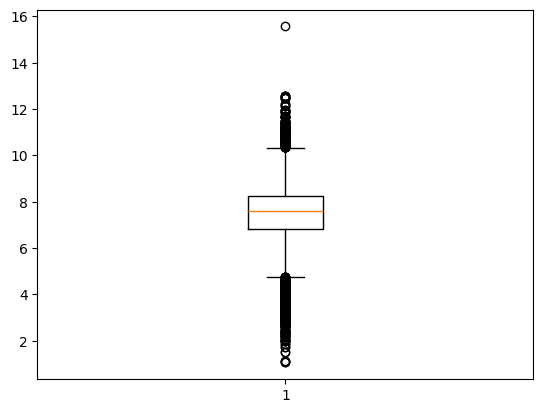

In [73]:
plt.boxplot((np.log(np.abs(G_shift))).ravel())
(np.log(np.abs(G_shift)+1)).mean()

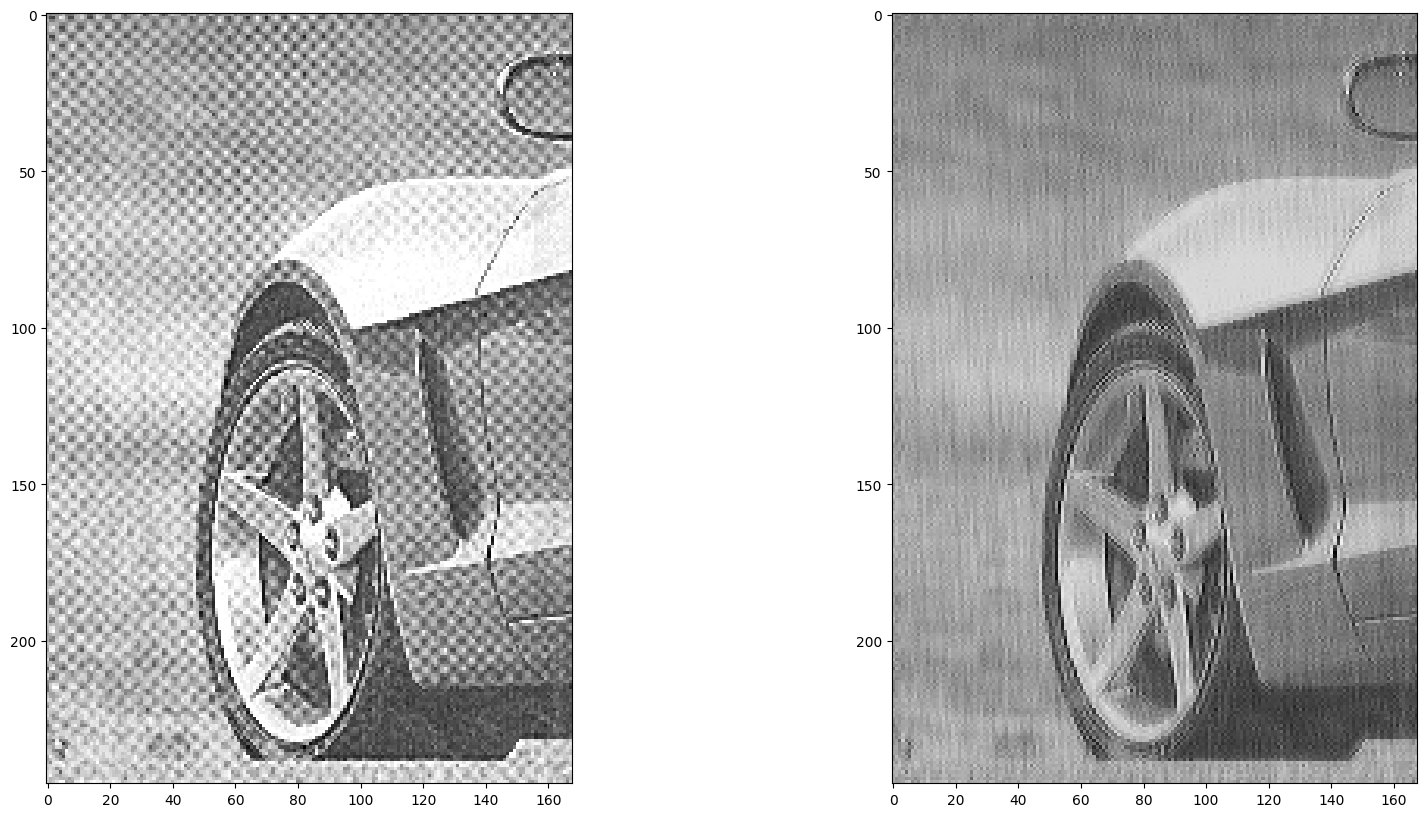

In [74]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.imshow(car_noise, cmap='gray')

plt.subplot(122)
plt.imshow(np.abs(g), cmap='gray')

In [75]:
np.abs(g).max()

246.03910215513034

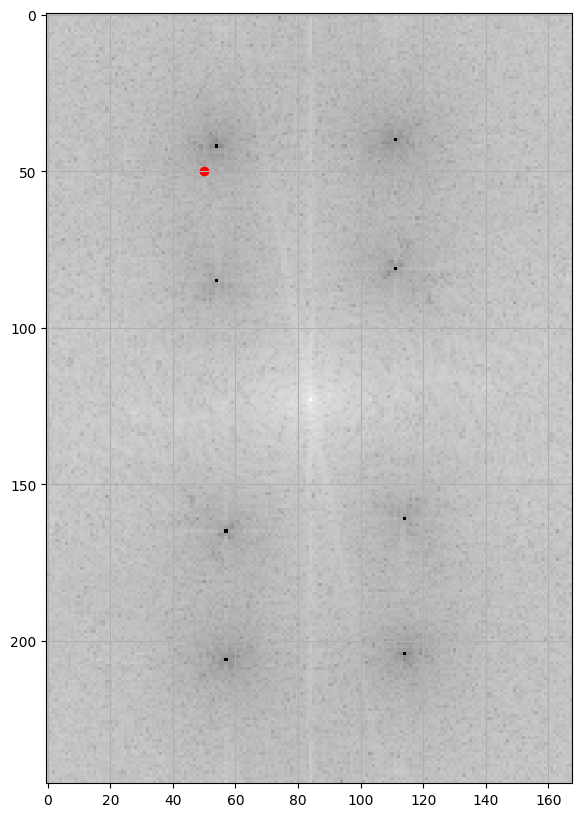

In [76]:
plt.figure(figsize=(20, 10))
plt.imshow(np.log(np.abs(G_shift)+1e-7), cmap='gray')

plt.scatter(50, 50, c='red')

plt.grid(True)

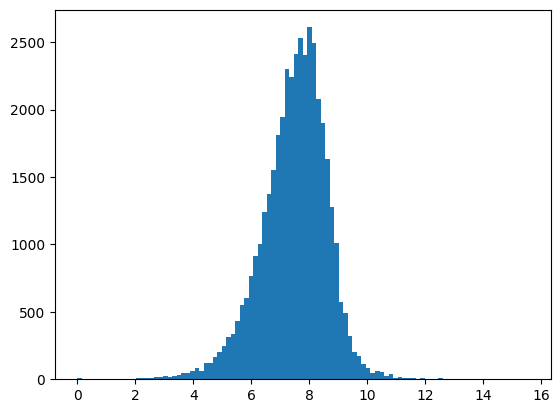

In [77]:
plt.hist(np.log(np.abs(G_shift)+1).ravel(), bins=100)

plt.show()

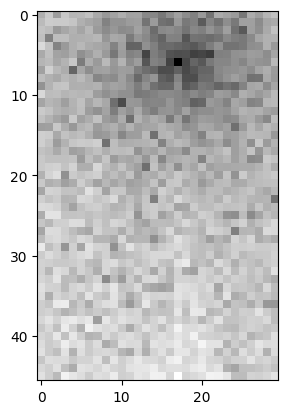

In [78]:
plt.imshow(np.log(np.abs(G_shift)+1)[200:250,40:70], cmap='gray')

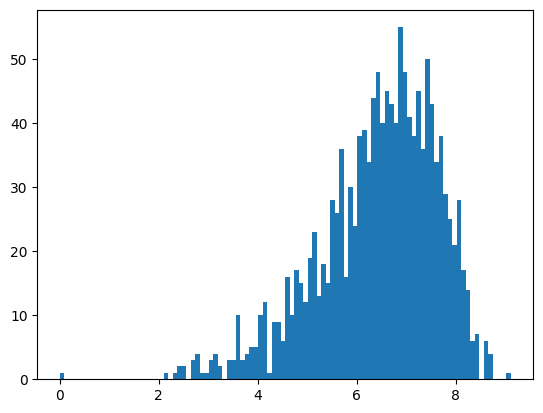

In [79]:
plt.hist(np.log(np.abs(G_shift)+1)[200:250,40:70].ravel(), bins=100)

plt.show()

In [80]:
np.log(np.abs(G_shift)+1)[200:250,40:70].max()

9.114997601461496